# Running BW1484 Benchmark on TITAN

## General Problem Specifications

In [13]:
import lxml.etree as ET
import string
xml = ET.parse('/data/work/tme_analysis/early_science/bw1484/bw1484_I.xml')
out = ET.tostring(xml, pretty_print=True, method="html")

root = xml.getroot()

Nr         = 0
mesh       = 0
N          = 0
num_groups = 0
for n in root:
        
    print (n.get('name'))
    
    if n.get('name') == "CORE":
        for m in n:
            d = dict(m.attrib)
            if d.has_key('value'):
                print "%15s %12s" % (d['name'], d['value'])
                
    if n.get('name') == "ASSEMBLIES":
        for m in n.iter():
            d = dict(m.attrib)
            if d['name'] == "num_pins":
                print "%15s %12s" % (d['name'], d['value'])
                Nr = string.atoi(d['value'])
            if d['name'] == "mesh":
                print "%15s %12s" % (d['name'], d['value'])
                
    if n.get('name') == "INSILICO":
        for m in n.iter():
            d = dict(m.attrib)
            if d['name'] == "mesh":
                print "%15s %12s" % (d['name'], d['value'])
                mesh = string.atoi(d['value'])
            if d['name'] == "Pn_order":
                print "%15s %12s" % (d['name'], d['value'])
                N = string.atoi(d['value'])
            if d['name'] == "num_groups":
                print "%15s %12s" % (d['name'], d['value'])
                num_groups = string.atoi(d['value'])

case_id
STATE
CORE
         apitch       98.148
       assm_map       {FUEL}
         bc_rad       vacuum
      core_size            1
         height       145.00
      lower_mat           al
    lower_thick         5.08
    lower_vfrac          1.0
     rated_flow   773.626492
    rated_power        159.1
          shape          {1}
ASSEMBLIES
           mesh            2
       num_pins           60
INSILICO
       Pn_order            3
           mesh           20
     num_groups           23
EDITS


In [14]:
print(out)

<?xml-stylesheet version="1.0" type="text/xsl" href="PL9.xsl"?>
<ParameterList name="CASEID">
  <Parameter name="case_id" type="string" value="BW 1484 Core I"></Parameter>
  <ParameterList name="STATE">
    <Parameter name="boron" type="double" value="0"></Parameter>
    <Parameter name="feedback" type="string" value="off"></Parameter>
    <Parameter name="modden" type="double" value="0.997992"></Parameter>
    <Parameter name="power" type="double" value="0.0"></Parameter>
    <Parameter name="sym" type="string" value="qtr"></Parameter>
    <Parameter name="tfuel" type="double" value="294.15"></Parameter>
    <Parameter name="tinlet" type="double" value="21"></Parameter>
  </ParameterList>
  <ParameterList name="CORE">
    <ParameterList name="Materials">
      <ParameterList name="Material_al">
        <Parameter name="density" type="double" value="2.688"></Parameter>
        <Parameter name="key_name" type="string" value="al"></Parameter>
        <Parameter name="mat_fracs" type="Arr

In [15]:
# number of axial cells with 1 cm spacing
Nz = 154

# total mesh axially (20 cells per pin in core, 2 cells per pin in water)
Nr = 552

In [7]:
bw = Image(filename='/data/work/tme_analysis/early_science/bw1484/out.png')

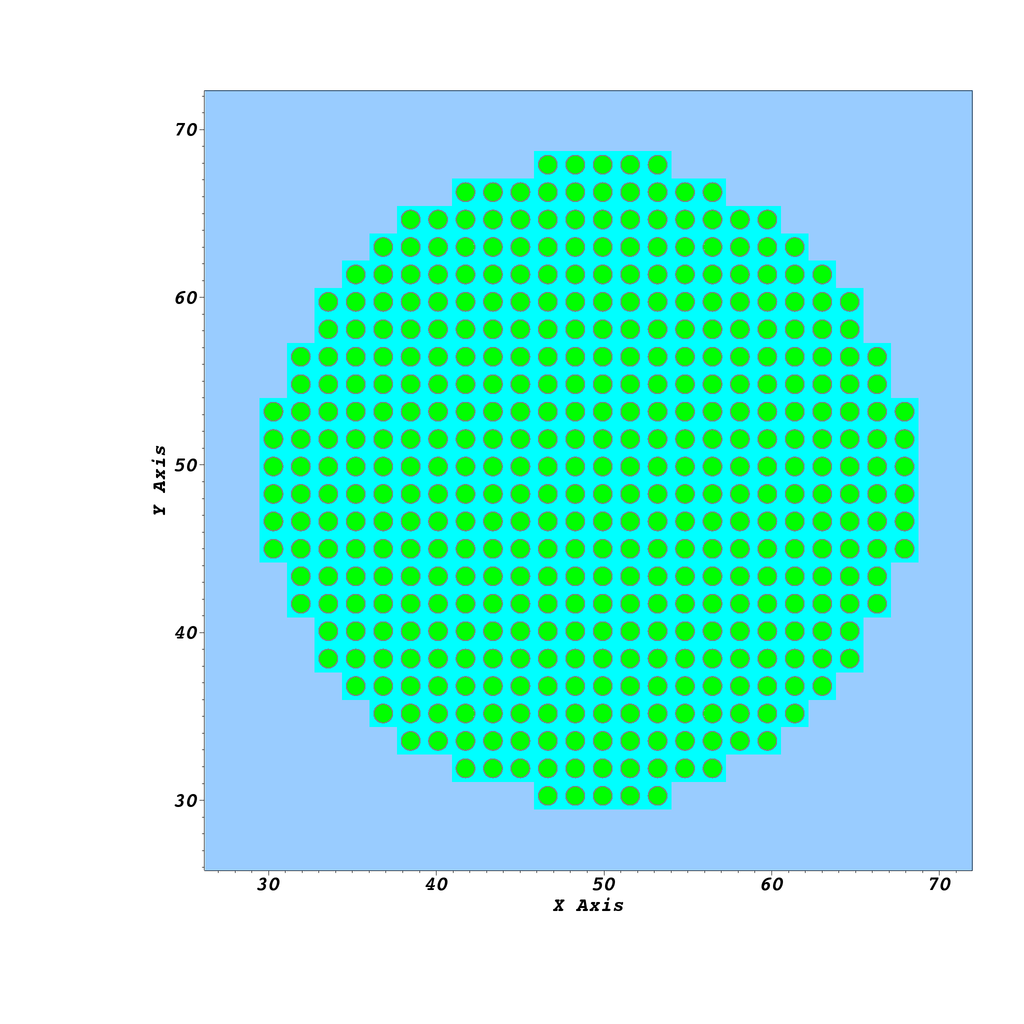

In [8]:
display(bw)

## KBA-Profiling for 1484 Problem Setup

In [4]:
%loadpy /data/denovo/Exnihilo/packages/Denovo/tools/kbaprofiler.py

In [19]:
###############################################################################
## kbaprofiler.py
## Thomas M. Evans
## Wed Mar 10 09:01:32 2010
## $Id: template.py,v 1.3 2008/01/02 17:18:47 9te Exp $
###############################################################################
## Copyright (C) 2008 Oak Ridge National Laboratory, UT-Battelle, LLC.
###############################################################################

import sys, os

##---------------------------------------------------------------------------##
## PROBLEM VARIABLES : SETUP BY USER
##---------------------------------------------------------------------------##

# Number of cells in each dimension
Ni = Nr
Nj = Nr
Nk = Nz

# Pn order
Pn = N

# Number of groups in memory (determined by loading the cross section set)
Ng = num_groups

# Specify a range of solved groups by setting range to 1 and then specifying
# the first and last group in range [g_first, g_last] (inclusive), the groups
# are defined over the range [0, Ng)
Range   = 0    # set to 1 if a solved range is specified
g_first = 0    # first group in range [0, Ng)
g_last  = 26   # last  group in range [0, Ng)

# Quadrature Setup (choose Level-symmetric or Product)
Levelsym = 0
Product  = 1

# if level-symmetric, set the Sn order
Sn = 8

# if product set the number of polar per octant and the number of azimuthals
# per polar
Npolar  = 6
Nazimth = 12

# set the equation set by placing setting it equal to 1
sc  = 0  # step-characteristics
tld = 0  # tri-linear discontinuous
ld  = 1  # linear-discontinuous
twd = 0  # theta-weighted-diamond
wdd = 0  # weighted-diamond-difference (use for regular weighted diamond and
         # diamond difference with flux-fixup)

# Domain Filters
Min_cores        = 2000   # minimum cores
Max_cores        = 25000  # maximum cores
Core_multiple    = 16     # restricted to multiples of this core count
Min_Cells_block  = 2000   # minimum cells per block
Min_Cells_domain = 1      # minimum cells per domain
Max_MB_domain    = 1000.0 # maximum state size per domain

# Ignore uniform block sizes (domain/block/efficiencies will be approximate)
Ignore_uniformity = 0 # set to 1 to ignore uniformity

# Minimum desired parallel efficiency
Min_eff = 0.80

##---------------------------------------------------------------------------##
## NO NEED FOR EDITING BELOW HERE
##---------------------------------------------------------------------------##
## Computer memory conversions

# Byte-sizes of words
DOUBLE = 8
INT    = 4

# Conversions to memory units
KB = 2.0**10
MB = 2.0**20
GB = 2.0**30
TB = 2.0**40

##---------------------------------------------------------------------------##
## Problem sizes

# angles per octant
M = 0
if Levelsym == 1:
    M = Sn * (Sn + 2) / 8
elif Product == 1:
    M = Npolar * Nazimth

# total angles
Na = M * 8

# total cells
Nc = Ni * Nj * Nk

# unknowns per cell
Nu = 1
if tld == 1: Nu = 8
if ld  == 1: Nu = 4

# number of moments
Nm = (Pn + 1) * (Pn + 1)

# number of solved groups
Ng_s = Ng
if Range == 1:
    Ng_s = 1 + g_last - g_first

# Global size of problem state
N_unknowns = Nu * Nc * Ng * Nm
B_unknowns = N_unknowns * DOUBLE / GB

# Number of unknowns per spatial cell
Nc_unknowns = Nu * Ng * Nm
Bc_unknowns = Nc_unknowns * DOUBLE / KB

# Global size of solved unknowns (degrees-of-freedom)
N_solved = Nu * Nc * Ng_s * Nm * Na

##---------------------------------------------------------------------------##
## Print Data Tables

print "********************************************************************"
print "Denovo KBA Problem Profiling"
print "===================================================================="
print "Problem Setup"
print "--------------------------------------------------------------------"
print
print "Number of cells in I           = %6i" % (Ni)
print "Number of cells in J           = %6i" % (Nj)
print "Number of cells in K           = %6i" % (Nk)
print "Number of spatial moments/cell = %6i" % (Nu)
print "Number of angular moments      = %6i" % (Nm)
print "Number of angles               = %6i" % (Na)
print "Number of angles per octant    = %6i" % (M)
print "Number of loaded energy groups = %6i" % (Ng)
print "Number of solved energy groups = %6i" % (Ng_s)
print
print "--------------------------------------------------------------------"
print "Global Sizes"
print "--------------------------------------------------------------------"
print
print "Number of total cells   = %16i" % (Nc)
print "Size of problem state   = %16i (words)" % (N_unknowns)
print "Size of problem state   = %16.5e (GB)" % (B_unknowns)
print
print "Number of unknowns/cell = %16i (words)" % (Nc_unknowns)
print "Memory per cell         = %16.5e (KB)" % (Bc_unknowns)
print
print "Solved DoF              = %16.5e (total unknowns)" % (N_solved)
print
print "--------------------------------------------------------------------"
print "Parallel Domain Analysis"
print "--------------------------------------------------------------------"
print

# Pi = number of partitions in I
# Pj = number of partitions in J

print "%7s %4s %4s %4s %5s %6s %8s %10s %12s" % \
    ("Domains", "Pi", "Pj", "Bk", "Eff", "Cells", "Cells", "MB/Domain", "Space-Angle")
print "%35s %8s %23s" % ("/Block", "/Domain", "/Domain")
print "...................................................................."

# maximum attainable efficiency
max_eff = 0.0

# loop over potential partitions in i, j
for Pj in xrange(1, Nj):
    for Pi in xrange(1, Ni):

        # check for equal-sized blocks
        if Ignore_uniformity != 1:
            if Ni % Pi != 0: continue
            if Nj % Pj != 0: continue

        # check if Pi * Pj > Min_cores
        N_domains = Pi * Pj
        if (N_domains % Core_multiple != 0): continue
        if (N_domains < Min_cores):          continue
        if (N_domains > Max_cores):          continue

        # number of cells in (I,J) in 1 partition
        Ib = Ni / float(Pi)
        Jb = Nj / float(Pj)

        # loop over z-blocks
        for Bk in xrange(1, Nk):

            # check for equal-sized blocks
            if Nk % Bk != 0: continue

            # number of cells in K-block
            Kb = Nk / Bk

            # cells per block
            Nb = Ib * Jb * Kb

            if Nb < Min_Cells_block: continue

            # cells per domain
            Dc = Ib * Jb * Nk

            if Dc < Min_Cells_domain: continue

            # memory per domain in MB
            Dm = Dc * Bc_unknowns * KB / MB

            if Dm > Max_MB_domain : continue

            # number of space-angle unknowns per block
            Usa = Nu * Nm * Na * Nb

            # calculate hypothetical efficiency
            eff = float(2 * M * Bk) / float(2 * M * Bk + Pi + Pj - 2)

            # calculate maximum efficiency
            max_eff = max(eff, max_eff)

            # print out
            if eff > Min_eff:
                print "%7i %4i %4i %4i %5.2f %6i %8i %10.3e %12i" % \
                    (N_domains, Pi, Pj, Bk, eff, Nb, Dc, Dm, Usa)

print "...................................................................."
print
print "Maximum efficiency attainable : %10.6f" % (max_eff)
print
print "********************************************************************"

###############################################################################
##                            end of kbaprofiler.py
###############################################################################



********************************************************************
Denovo KBA Problem Profiling
Problem Setup
--------------------------------------------------------------------

Number of cells in I           =    552
Number of cells in J           =    552
Number of cells in K           =    154
Number of spatial moments/cell =      4
Number of angular moments      =     16
Number of angles               =    576
Number of angles per octant    =     72
Number of loaded energy groups =     23
Number of solved energy groups =     23

--------------------------------------------------------------------
Global Sizes
--------------------------------------------------------------------

Number of total cells   =         46924416
Size of problem state   =      69072740352 (words)
Size of problem state   =      5.14632e+02 (GB)

Number of unknowns/cell =             1472 (words)
Memory per cell         =      1.15000e+01 (KB)

Solved DoF              =      3.97859e+13 (total unknowns)

-

## Final XML for 252 Group Problem

In [14]:
Nb = 2208
Px = 92
Py = 24
Bz = 7
Ng = 252

In [15]:
num_sets = Ng / 6
num_sets

42

In [16]:
domains = num_sets * Nb

In [17]:
domains

92736

In [18]:
num_nodes = domains / 16
print(num_nodes)

5796


In [19]:
domains % 16

0

In [20]:
Nz % Bz

0

In [40]:
xml = ET.parse('/data/work/tme_analysis/early_science/bw1484/bw1484_I252G.xml')
out = ET.tostring(xml, pretty_print=True, method="html")

root = xml.getroot()

for n in root[4]:
    print n.items()

[('name', 'Pn_correction'), ('type', 'bool'), ('value', 'false')]
[('name', 'Pn_order'), ('type', 'int'), ('value', '3')]
[('name', 'cell_homogenize'), ('type', 'bool'), ('value', 'false')]
[('name', 'dimension'), ('type', 'int'), ('value', '3')]
[('name', 'do_transport'), ('type', 'bool'), ('value', 'true')]
[('name', 'eigenvalue_db')]
[('name', 'eq_set'), ('type', 'string'), ('value', 'ld')]
[('name', 'mat_library'), ('type', 'string'), ('value', 'bw1484_comp.sh5')]
[('name', 'max_delta_z'), ('type', 'double'), ('value', '1.0')]
[('name', 'mesh'), ('type', 'int'), ('value', '20')]
[('name', 'num_blocks_i'), ('type', 'int'), ('value', '92')]
[('name', 'num_blocks_j'), ('type', 'int'), ('value', '24')]
[('name', 'num_groups'), ('type', 'int'), ('value', '252')]
[('name', 'num_sets'), ('type', 'int'), ('value', '42')]
[('name', 'num_z_blocks'), ('type', 'int'), ('value', '7')]
[('name', 'problem_name'), ('type', 'string'), ('value', 'out_bw1484_I252G_sn')]
[('name', 'quadrature_db')]
[(

### Output with 16 cores per node

### Setup for 8 cores per node

In [23]:
num_nodes = domains / 8
print(num_nodes)

11592


In [25]:
domains

92736

In [26]:
num_nodes * 8

92736